# pandas fundamentals exercises
Date: 18/10/2021

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**. Please check the [Questions][link]

[link]: https://github.com/kokchun/Databehandling-21/blob/main/Exercises/E00_pandas_basic_syntax.ipynb

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [1]:
import pandas as pd
import numpy as np

df_1 = pd.DataFrame({"Kommun":["Malmö", "Stockholm", "Uppsala", "Göteborg"], "Population":[347949, 975551, 233839, 583056]})
df_1.head(5)

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [2]:
## print cities:
print(df_1["Kommun"])

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object


In [3]:
print(df_1["Kommun"]=="Göteborg")

0    False
1    False
2    False
3     True
Name: Kommun, dtype: bool


In [4]:
print(df_1[df_1["Kommun"]=="Göteborg"])

     Kommun  Population
3  Göteborg      583056


In [5]:
#c Population from largest to smallest
population_sort = df_1.sort_values(by="Population", ascending=False)
print(population_sort)

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839


In [6]:
print(population_sort.head(3))

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949


In [7]:
df_1["Population"]/100

0    3479.49
1    9755.51
2    2338.39
3    5830.56
Name: Population, dtype: float64

In [8]:
sweden_population = 10379295
df_1["Pop %"] = df_1["Population"]/sweden_population*100
#df = pd.DataFrame({"Kommun":series, "Population":population, "Pop_per_%": population_per})
df_1["Pop %"]=df_1["Pop %"].round(2)
df_1

,Kommun,Population,Pop %
0,Malmö,347949,3.35
1,Stockholm,975551,9.40
2,Uppsala,233839,2.25
3,Göteborg,583056,5.62


---

## 2. Cities in Sweden - real dataset (*)

Go into [this page][scb_pop50], scroll down and download the Excel file containing Swedish population dataset from SCB.

[scb_pop50]: https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/topplistor-kommuner/folkmangd-topp-50/

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


a) and b)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "../Data/komtopp50_2020.xlsx"
df2 = pd.read_excel(path, sheet_name="Totalt")
df2 = df2.iloc[6:]
df2 = df2.rename({"Unnamed: 0": "Rang 2020","Unnamed: 1": "Rang 2019", "Unnamed: 2": "Kommun", "Unnamed: 3": "Folkmängd 2020", "Unnamed: 4": "Folkmängd 2019", "Unnamed: 5": "Förändring"}, axis="columns")
df2 = df2.reset_index(drop=True)
df2["Rang 2019"]=df2["Rang 2019"].astype(int)
df2["Folkmängd 2019"]=df2["Folkmängd 2019"].astype(int)
df2["Rang 2020"]=df2["Rang 2020"].astype(int)
df2["Folkmängd 2020"]=df2["Folkmängd 2020"].astype(int)

In [10]:
df2.shape

(290, 6)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rang 2020       290 non-null    int32 
 1   Rang 2019       290 non-null    int32 
 2   Kommun          290 non-null    object
 3   Folkmängd 2020  290 non-null    int32 
 4   Folkmängd 2019  290 non-null    int32 
 5   Förändring      290 non-null    object
dtypes: int32(4), object(2)
memory usage: 9.2+ KB


In [12]:
df2.describe()

,Rang 2020,Rang 2019,Folkmängd 2020,Folkmängd 2019
count,290.000000,290.000000,290.000000,290.000000
mean,145.500000,145.496552,35790.672414,35612.375862
std,83.860002,83.856743,74627.031657,74292.525065
min,1.000000,1.000000,2387.000000,2408.000000
25%,73.250000,73.250000,10014.500000,10075.000000
50%,145.500000,145.500000,16079.500000,15978.000000
75%,217.750000,217.750000,36215.250000,36096.750000
max,290.000000,290.000000,975551.000000,974073.000000


In [13]:
df2.head(10)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.34074
5,287,287,Arjeplog,2718,2785,-2.405745
6,261,261,Arvidsjaur,6145,6220,-1.205788
7,103,102,Arvika,25932,26045,-0.433864
8,198,199,Askersund,11471,11377,0.826228
9,112,112,Avesta,23067,23178,-0.478902


c)

In [14]:
cities_top5 = df2.sort_values(by="Folkmängd 2020", ascending=False).head()
cities_top5

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.65167
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822


d)

In [15]:
cities_bottom5 = df2.sort_values(by="Folkmängd 2020", ascending=False).tail()
cities_bottom5

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
271,286,286,Åsele,2805,2794,0.393701
5,287,287,Arjeplog,2718,2785,-2.405745
29,288,288,Dorotea,2498,2551,-2.077617
194,289,289,Sorsele,2442,2489,-1.888309
12,290,290,Bjurholm,2387,2408,-0.872093


e)

In [16]:
sum_2020 = np.sum(df2["Folkmängd 2020"])
print(f"Sweden's population in 2020 is: {sum_2020:.0f}")

sum_2019 = np.sum(df2["Folkmängd 2019"])
print(f"Sweden's population in 2019 is: {sum_2019:.0f}")

Sweden's population in 2020 is: 10379295
Sweden's population in 2019 is: 10327589


f)

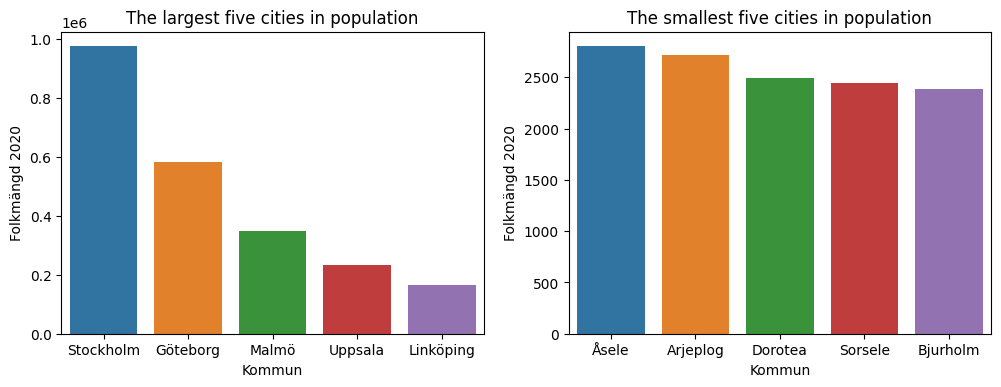

In [17]:
fig, ax = plt.subplots(1,2, dpi=100, figsize=(12,4))
sns.barplot(data=cities_top5, x="Kommun", y="Folkmängd 2020", ax=ax[0]).set(title="The largest five cities in population");
sns.barplot(data=cities_bottom5, x="Kommun", y="Folkmängd 2020", ax=ax[1]).set(title="The smallest five cities in population");

---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


a)

In [18]:
def get_data_from_excel(path, my_sheet_name=None):
    df = pd.read_excel(path, sheet_name=my_sheet_name)
    df = df.iloc[6:]
    df = df.rename({"Unnamed: 0": "Rang 2020","Unnamed: 1": "Rang 2019", "Unnamed: 2": "Kommun", "Unnamed: 3": "Folkmängd 2020", "Unnamed: 4": "Folkmängd 2019", "Unnamed: 5": "Förändring"}, axis="columns")
    df = df.reset_index(drop=True)
    df["Rang 2019"] = df["Rang 2019"].astype(int)
    df["Folkmängd 2019"] = df["Folkmängd 2019"].astype(int)
    df2["Rang 2020"]=df2["Rang 2020"].astype(int)
    df2["Folkmängd 2020"]=df2["Folkmängd 2020"].astype(int)
    return df


In [19]:
path = "../Data/komtopp50_2020.xlsx"
df_kvinna = get_data_from_excel(path, "Kvinnor")
df_kvinna["Kön"]="Kvinna"
df_kvinna.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinna
1,64,64,Alingsås,20900,20774,0.606527,Kvinna
2,123,123,Alvesta,9857,9795,0.632976,Kvinna
3,255,255,Aneby,3318,3350,-0.955224,Kvinna
4,165,164,Arboga,6945,6973,-0.401549,Kvinna


In [20]:
df_man = get_data_from_excel(path, "Män")
df_man["Kön"]="Man"
df_man.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man


b)

In [21]:
df_total = df_kvinna.append(df_man)
df_total.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinna
1,64,64,Alingsås,20900,20774,0.606527,Kvinna
2,123,123,Alvesta,9857,9795,0.632976,Kvinna
3,255,255,Aneby,3318,3350,-0.955224,Kvinna
4,165,164,Arboga,6945,6973,-0.401549,Kvinna


In [22]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 289
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rang 2020       580 non-null    object
 1   Rang 2019       580 non-null    int32 
 2   Kommun          580 non-null    object
 3   Folkmängd 2020  580 non-null    object
 4   Folkmängd 2019  580 non-null    int32 
 5   Förändring      580 non-null    object
 6   Kön             580 non-null    object
dtypes: int32(2), object(5)
memory usage: 31.7+ KB


c)

In [23]:
df2.head()
df2 = df2.rename({"Folkmängd 2020": "Total Pop 2020", "Folkmängd 2019": "Total Pop 2019", "Förändring": "Total förändring"}, axis="columns")
df2 = df2.drop(["Rang 2020", "Rang 2019"], axis=1)
df2.head()

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.34074


d)

In [24]:
df_total = df_total.drop(["Rang 2020", "Rang 2019"], axis=1)
df_merge = pd.merge(df_total, df2, how="outer", on=["Kommun"])
df_merge = df_merge.sort_values(by=["Total Pop 2020", "Kön"], ascending=False)
df_merge = df_merge.set_index("Kommun")
df_merge.head()

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734
Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734
Göteborg,292505,290308,0.756782,Man,583056,579281,0.65167
Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.65167
Malmö,172538,170623,1.122357,Man,347949,344166,1.099179


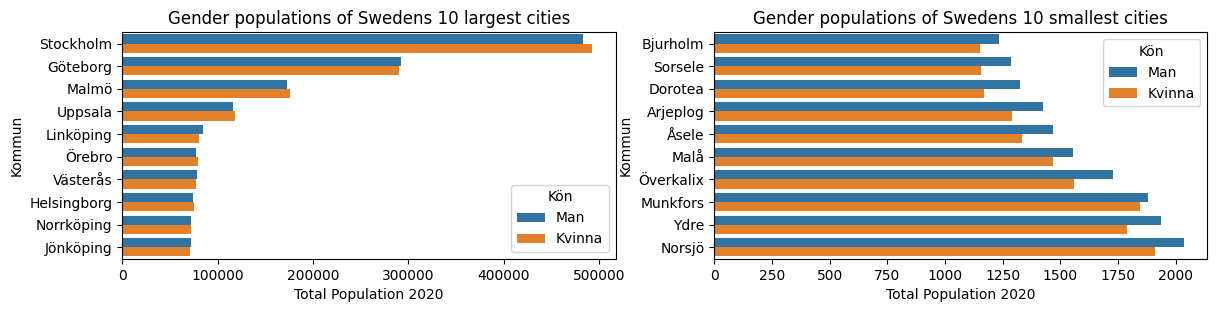

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,2, dpi=100, figsize=(14,3))


Pop_top20 = df_merge.sort_values(by="Total Pop 2020", ascending = False).head(20)
Pop_bottom20 = df_merge.sort_values(by="Total Pop 2020", ascending = True).head(20)

for i, dataframe in enumerate([Pop_top20, Pop_bottom20]):
    sns.barplot(data=dataframe, y=dataframe.index, x="Folkmängd 2020", hue="Kön", hue_order=["Man", "Kvinna"], ax=ax[i]);

ax[0].set(title="Gender populations of Swedens 10 largest cities", xlabel="Total Population 2020", ylabel="Kommun");
ax[1].set(title="Gender populations of Swedens 10 smallest cities", xlabel="Total Population 2020", ylabel="Kommun");

## question 3. f)

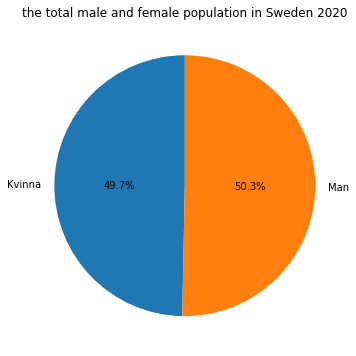

In [26]:
data = df_merge.groupby("Kön")["Folkmängd 2020"].sum()
#Using matplotlib
#https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/
fig, ax = plt.subplots(figsize=[10,6])
fig.set_facecolor("white")
labels = data.keys()
ax.pie(x=data, startangle=90, labels=labels, autopct="%.1f%%", pctdistance=0.5)
ax.set(title="the total male and female population in Sweden 2020");

## Question 3. g)

In [27]:
df_merge.head()

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734
Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734
Göteborg,292505,290308,0.756782,Man,583056,579281,0.65167
Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.65167
Malmö,172538,170623,1.122357,Man,347949,344166,1.099179


In [28]:
series_man = df_merge[df_merge['Kön'] == 'Man']['Folkmängd 2020'].astype(int)
series_kvinna = df_merge[df_merge['Kön'] == 'Kvinna']['Folkmängd 2020'].astype(int)
series_total = df_merge[df_merge['Kön'] == 'Kvinna']['Total Pop 2020'].astype(int)
df_merge['Gender_diff_%'] = abs(series_man-series_kvinna)/series_total*100
df_merge['Gender_diff_%'] = df_merge['Gender_diff_%'].round(2)
df_merge.head()

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring,Gender_diff_%
Kommun,,,,,,,,
Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734,0.98
Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734,0.98
Göteborg,292505,290308,0.756782,Man,583056,579281,0.65167,0.34
Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.65167,0.34
Malmö,172538,170623,1.122357,Man,347949,344166,1.099179,0.83


In [29]:
# Top 5 largest cities in gender difference procentage
gender_diff_top5= df_merge.sort_values(by="Gender_diff_%", ascending=False).head(10)
gender_diff_top5

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring,Gender_diff_%
Kommun,,,,,,,,
Pajala,2778,2830,-1.837456,Kvinna,5966,6052,-1.421018,6.87
Pajala,3188,3222,-1.055245,Man,5966,6052,-1.421018,6.87
Dorotea,1171,1195,-2.008368,Kvinna,2498,2551,-2.077617,6.24
Dorotea,1327,1356,-2.138643,Man,2498,2551,-2.077617,6.24
Bräcke,3265,3320,-1.656627,Man,6181,6298,-1.857733,5.65
Bräcke,2916,2978,-2.081934,Kvinna,6181,6298,-1.857733,5.65
Sorsele,1157,1170,-1.111111,Kvinna,2442,2489,-1.888309,5.24
Sorsele,1285,1319,-2.57771,Man,2442,2489,-1.888309,5.24
Överkalix,1730,1737,-0.402994,Man,3289,3315,-0.784314,5.20


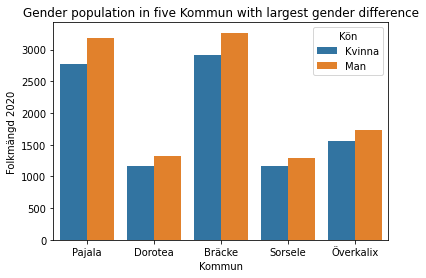

In [30]:
sns.barplot(data=gender_diff_top5, y="Folkmängd 2020", x=gender_diff_top5.index, hue="Kön").set(title="Gender population in five Kommun with largest gender difference");

## Question 3. h)

In [31]:
df2.head()

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.34074


In [32]:
change_in_pop_top5 = df2.sort_values(by="Total förändring", ascending=False).head().set_index("Kommun")
change_in_pop_top5.head()

,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,
Trosa,14309,13747,4.088165
Upplands-Bro,30195,29346,2.893069
Lekeberg,8472,8234,2.890454
Åre,12049,11727,2.7458
Österåker,46644,45574,2.34783


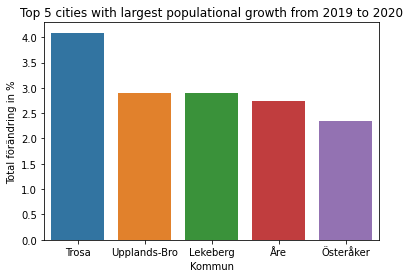

In [33]:
#plt.title and ax.set(title="")
sns.barplot(data=change_in_pop_top5, x=change_in_pop_top5.index, y="Total förändring").set(title="Top 5 cities with largest populational growth from 2019 to 2020", xlabel="Kommun", ylabel="Total förändring in %");